# Final Capstone Project Notebook

## Introduction

This project aims to formulate a machine learned prediction model  by fetching and analyzing data from the API https://developer.nrel.gov/. <br> This API contains information on a vast network of EV Charging Stations in the United States of America. <br>

The goal of the prediction model is to identify which EV Charging Stations are deployed.

## Project Overview

1. Data Fetching
2. EDA
3. Data Cleaning and Preparation
4. Visualization
5. Feature Engineering
6. Model Building & Comparison

### 1. Data Fetching

In [5]:
# Basic Imports

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Using my API key
api_key = 'tWWLb4qhhbmJaA9jb0lehgF2p2iIbHkSjoZScOEC'

# NREL Alternative Fuel Stations API URL
url = f'https://developer.nrel.gov/api/alt-fuel-stations/v1.json?api_key={api_key}&fuel_type=ELEC'


# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data)  # Print the retrieved data
else:
    print('Error:', response.status_code)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
# Extracting relevant fields
stations = data['fuel_stations']

# Convert to DataFrame with additional columns
df = pd.DataFrame(stations, columns=[
    'station_name', 'latitude', 'longitude', 'city', 'state', 
    'ev_network', 'ev_connector_types', 
    'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_pricing', 
    'access_days_time', 'date_last_confirmed', 'status_code'
])

# Display the first few rows
print(df.head())

                        station_name   latitude   longitude         city  \
0           LADWP - Truesdale Center  34.248319 -118.387971   Sun Valley   
1      Los Angeles Convention Center  34.040539 -118.271387  Los Angeles   
2      LADWP - John Ferraro Building  34.059133 -118.248589  Los Angeles   
3         LADWP - Haynes Power Plant  33.759802 -118.096665   Long Beach   
4  LADWP - Harbor Generating Station  33.770508 -118.265628   Wilmington   

  state      ev_network            ev_connector_types  ev_level2_evse_num  \
0    CA  SHELL_RECHARGE  [CHADEMO, J1772, J1772COMBO]                57.0   
1    CA   Non-Networked                       [J1772]                 7.0   
2    CA   Non-Networked  [CHADEMO, J1772, J1772COMBO]               338.0   
3    CA   Non-Networked  [CHADEMO, J1772, J1772COMBO]                19.0   
4    CA   Non-Networked                       [J1772]                10.0   

   ev_dc_fast_num         ev_pricing                 access_days_time  \
0      

### 2. EDA

In [9]:
df

,station_name,latitude,longitude,city,state,ev_network,ev_connector_types,ev_level2_evse_num,ev_dc_fast_num,ev_pricing,access_days_time,date_last_confirmed,status_code
0,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,SHELL_RECHARGE,"[CHADEMO, J1772, J1772COMBO]",57.0,2.0,None,Fleet use only,2023-09-14,E
1,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,Non-Networked,[J1772],7.0,NaN,Free; parking fee,5:30am-9pm; pay lot,2023-01-10,E
2,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,Non-Networked,"[CHADEMO, J1772, J1772COMBO]",338.0,12.0,None,For fleet and employee use only,2023-09-14,E
3,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,Non-Networked,"[CHADEMO, J1772, J1772COMBO]",19.0,1.0,None,Fleet use only,2024-01-09,E
4,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,Non-Networked,[J1772],10.0,NaN,None,Fleet use only,2024-01-09,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82903,COHERE LIFE BR2,33.325276,-111.556147,Apache Junction,AZ,ChargePoint Network,[J1772],2.0,NaN,None,24 hours daily,2025-04-09,E
82904,COHERE LIFE BR4,33.324627,-111.556039,Apache Junction,AZ,ChargePoint Network,[J1772],2.0,NaN,None,24 hours daily,2025-04-09,E
82905,COHERE LIFE BR3,33.323681,-111.553070,Apache Junction,AZ,ChargePoint Network,[J1772],2.0,NaN,None,24 hours daily,2025-04-09,E
82906,MERRITT 702 STATION 2,39.274940,-76.506719,Baltimore,MD,ChargePoint Network,[J1772],1.0,NaN,None,24 hours daily,2025-04-09,E


In [10]:
df['ev_network'].unique()

array(['SHELL_RECHARGE', 'Non-Networked', 'EV Connect', 'POWERFLEX',
       'ChargePoint Network', 'OpConnect', 'Tesla Destination',
       'FORD_CHARGE', 'EVGATEWAY', 'eVgo Network', None, 'AMPUP', 'EVCS',
       'SWTCH', 'UNIVERSAL', 'Blink Network', 'REVITALIZE', 'RED_E',
       'Tesla', 'ZEFNET', 'CHARGIE', 'Electrify America', 'FCN',
       'VIALYNK', 'FLO', 'FPLEV', 'EVMATCH', 'JULE', '7CHARGE',
       'RIVIAN_WAYPOINTS', 'LOOP', 'CHARGELAB', 'CIRCLE_K', 'AMPED_UP',
       'APPLEGREEN', 'WAVE', 'BP_PULSE', 'EVRANGE', 'CHARGESMART_EV',
       'GRAVITI_ENERGY', 'FLASH', 'RIVIAN_ADVENTURE', 'CHARGEUP',
       'NOODOE', 'TURNONGREEN', 'REVEL', 'ELECTRIC_ERA', 'STAY_N_CHARGE',
       'ENVIROSPARK', 'CHARGENET', 'EVBOLT', 'EVPOWER', 'HONEY_BADGER',
       'FLITWAY', 'ABM', 'EVIUM', 'MATCHA', 'WATT_EV', 'AUTEL', 'EVOKE',
       'POWERPUMP', 'GRAVITY_CHARGING_CENTER', 'Enel X Way',
       'POWERPORT_EVC', 'IN_CHARGE', 'EVPASSPORT', 'KWIK_CHARGE'],
      dtype=object)

In [11]:
print(df['ev_network'].value_counts()) # This will be the target variable. Will need to clean this one up.

ev_network
ChargePoint Network        42993
Non-Networked               9705
Blink Network               7514
Tesla Destination           4961
Tesla                       2529
                           ...  
EVPASSPORT                     2
WAVE                           2
MATCHA                         1
HONEY_BADGER                   1
GRAVITY_CHARGING_CENTER        1
Name: count, Length: 66, dtype: int64


In [12]:
df.isna().sum() # ev_dc_fast_num & ev_pricing have a majority of their data missing. Need to investigate more.

station_name               0
latitude                   0
longitude                  0
city                       0
state                      0
ev_network                16
ev_connector_types        37
ev_level2_evse_num     12223
ev_dc_fast_num         69518
ev_pricing             67508
access_days_time        8178
date_last_confirmed      105
status_code                0
dtype: int64

In [13]:
df.dtypes

station_name            object
latitude               float64
longitude              float64
city                    object
state                   object
ev_network              object
ev_connector_types      object
ev_level2_evse_num     float64
ev_dc_fast_num         float64
ev_pricing              object
access_days_time        object
date_last_confirmed     object
status_code             object
dtype: object

### 3. Data Cleaning and Preparation

In [15]:
# Filtering through EV networks and picking the top 10.
top_networks = df['ev_network'].value_counts().nlargest(10).index

# Replacing the less numerous EV networks as 'Other'
df['ev_network_cleaned'] = df['ev_network'].apply(lambda x: x if x in top_networks else 'Other')

# Reprinting value counts
print(df['ev_network_cleaned'].value_counts())

ev_network_cleaned
ChargePoint Network    42993
Non-Networked           9705
Other                   7582
Blink Network           7514
Tesla Destination       4961
Tesla                   2529
SHELL_RECHARGE          2525
EV Connect              1837
eVgo Network            1177
Electrify America       1053
AMPUP                   1032
Name: count, dtype: int64


*Columns 'ev_dc_fast_num' and 'ev_level2_evse_num' are descriptions of charging stations that are equipped with DC Fast Chargers and Level 2 Fast Chargers respectively.*

In [17]:
# Filling missing values in those columns with 0. These stations are not equipped with those chargers.

df['ev_level2_evse_num'] = df['ev_level2_evse_num'].fillna(0)
df['ev_dc_fast_num'] = df['ev_dc_fast_num'].fillna(0)

In [18]:
# Removing the singular missing value in EV Network

df = df.dropna(subset=['ev_network'])

In [19]:
# Updating list to observe what needs to be modified.

df.isna().sum()

station_name               0
latitude                   0
longitude                  0
city                       0
state                      0
ev_network                 0
ev_connector_types        21
ev_level2_evse_num         0
ev_dc_fast_num             0
ev_pricing             67493
access_days_time        8164
date_last_confirmed      105
status_code                0
ev_network_cleaned         0
dtype: int64

In [20]:
# Removing rows with missing values contained in 'ev_connector_types' and 'date_last_confirmed' considering their low count.

df = df.dropna(subset=['ev_connector_types', 'date_last_confirmed'])

In [21]:
# Next to be fixed is access_days_time.

df['access_days_time'].nunique()

1759

In [22]:
# There are far too many entries in this field, yet EV charging station availability is an important factor for business operations.
# Rather than removing close to 10% of entries in this dataset, the category will be simplified.

def simplify_access_time(value):
    if pd.isna(value):
        return 'Unknown' # Null values to be changed to 'Unknown'
    elif '24 hours daily' in value.lower() or '24/7' in value.lower():
        return '24/7'    # Replacing values that have '24/7' or all day format to 24/7
    elif 'business hours' in value.lower():
        return 'Business Hours'
    else:
        return 'Limited Hours'

df['access_time_category'] = df['access_days_time'].apply(simplify_access_time)

In [23]:
# Making sure that the result of the previous function shows new simplified categories.

print(df['access_time_category'].value_counts())

access_time_category
24/7              66165
Unknown            8158
Limited Hours      6979
Business Hours     1464
Name: count, dtype: int64


In [24]:
# Seeing as this newly made category is simplified, removing the original.

df = df.drop(columns=['access_days_time'])

In [25]:
# Dropping station name as well since it is not going to be a deciding factor into this model

df = df.drop(columns=['station_name'])

In [26]:
# Let's observe ev_pricing to better understand how to clean it.

print(df['ev_pricing'].value_counts(dropna=False))

ev_pricing
None                                                                         67403
Free                                                                         11188
FREE                                                                           811
$2.00/Hr Parking Fee                                                           167
$1.00/Hr Parking Fee                                                           117
                                                                             ...  
$2 per hour for first two hours; $4 per hour every hour thereafter               1
$2 per 30 minutes                                                                1
$0.00-$15.00/Hr Variable Parking Fee, $0.10-$0.21/kWh Variable Energy Fee        1
$0.50/Hr Parking Fee , $0.25/kWh Energy Fee                                      1
$1.65 per hour                                                                   1
Name: count, Length: 837, dtype: int64


In [27]:
# Seeing as this column also contains numerous entries, it will be simplified.
# Pricing is a key component for business operations, and should be kept for analysis.

def simplify_pricing(value):
    if pd.isna(value) or 'unknown' in str(value).lower():
        return 'Unknown' # Replacing missing values as Unknown
    elif 'free' in str(value).lower():
        return 'Free' # Replacing values with 'free' including in the string to 'Free'
    else:
        return 'Varies' # All other values to 'Varies'

df['pricing_category'] = df['ev_pricing'].apply(simplify_pricing)

In [28]:
# Making sure that the result of the previous function shows new simplified categories.

print(df['pricing_category'].value_counts())

pricing_category
Unknown    67423
Free       12238
Varies      3105
Name: count, dtype: int64


In [29]:
# Seeing as this newly made category is simplified, removing the original.

df = df.drop(columns=['ev_pricing'])

In [30]:
df.isna().sum()

latitude                0
longitude               0
city                    0
state                   0
ev_network              0
ev_connector_types      0
ev_level2_evse_num      0
ev_dc_fast_num          0
date_last_confirmed     0
status_code             0
ev_network_cleaned      0
access_time_category    0
pricing_category        0
dtype: int64

In [31]:
# Dropping the city column since it has over 840 entries which could introduce high cardinality in feature engineering steps.

df = df.drop(columns=['city'])

In [32]:
# Maintaining state column because it's more manageable. 
# States also capture broader and more relevant EV infrastructure and policy regulation differences.

df

,latitude,longitude,state,ev_network,ev_connector_types,ev_level2_evse_num,ev_dc_fast_num,date_last_confirmed,status_code,ev_network_cleaned,access_time_category,pricing_category
0,34.248319,-118.387971,CA,SHELL_RECHARGE,"[CHADEMO, J1772, J1772COMBO]",57.0,2.0,2023-09-14,E,SHELL_RECHARGE,Limited Hours,Unknown
1,34.040539,-118.271387,CA,Non-Networked,[J1772],7.0,0.0,2023-01-10,E,Non-Networked,Limited Hours,Free
2,34.059133,-118.248589,CA,Non-Networked,"[CHADEMO, J1772, J1772COMBO]",338.0,12.0,2023-09-14,E,Non-Networked,Limited Hours,Unknown
3,33.759802,-118.096665,CA,Non-Networked,"[CHADEMO, J1772, J1772COMBO]",19.0,1.0,2024-01-09,E,Non-Networked,Limited Hours,Unknown
4,33.770508,-118.265628,CA,Non-Networked,[J1772],10.0,0.0,2024-01-09,E,Non-Networked,Limited Hours,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
82903,33.325276,-111.556147,AZ,ChargePoint Network,[J1772],2.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown
82904,33.324627,-111.556039,AZ,ChargePoint Network,[J1772],2.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown
82905,33.323681,-111.553070,AZ,ChargePoint Network,[J1772],2.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown
82906,39.274940,-76.506719,MD,ChargePoint Network,[J1772],1.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown


In [33]:
# Forgot to drop the original ev_network column now that it is cleaned.

df = df.drop(columns=['ev_network'])

In [34]:
df.dtypes

latitude                float64
longitude               float64
state                    object
ev_connector_types       object
ev_level2_evse_num      float64
ev_dc_fast_num          float64
date_last_confirmed      object
status_code              object
ev_network_cleaned       object
access_time_category     object
pricing_category         object
dtype: object

In [35]:
# Fixing issue in the ev_connector_types column

df['ev_connector_types'] = df['ev_connector_types'].apply(lambda x: x if isinstance(x, list) else [])

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
connector_df = pd.DataFrame(mlb.fit_transform(df['ev_connector_types']), columns=mlb.classes_)

# Adding ev_connector_types back to the main DataFrame individually
df = df.join(connector_df).drop(columns=['ev_connector_types'])

In [37]:
# Reviewing value counts for each categorical column prior to feature engineering.

print(df.select_dtypes(include='object').nunique())

state                   52
date_last_confirmed     57
status_code              3
ev_network_cleaned      11
access_time_category     4
pricing_category         3
dtype: int64


In [38]:
# Dropping these columns because there are only 2 of each value associated and do not represent a substantial portion of data.

df = df.drop(columns=['NEMA515', 'NEMA520', 'NEMA1450'])

In [39]:
df.isna().sum()

latitude                  0
longitude                 0
state                     0
ev_level2_evse_num        0
ev_dc_fast_num            0
date_last_confirmed       0
status_code               0
ev_network_cleaned        0
access_time_category      0
pricing_category          0
CHADEMO                 142
J1772                   142
J1772COMBO              142
TESLA                   142
dtype: int64

In [40]:
# Safe to assume that the missing values for these types of connectors are 0 if the values are missing.

df[['CHADEMO', 'J1772', 'J1772COMBO', 'TESLA']] = df[['CHADEMO', 'J1772', 'J1772COMBO', 'TESLA']].fillna(0)

In [41]:
df

,latitude,longitude,state,ev_level2_evse_num,ev_dc_fast_num,date_last_confirmed,status_code,ev_network_cleaned,access_time_category,pricing_category,CHADEMO,J1772,J1772COMBO,TESLA
0,34.248319,-118.387971,CA,57.0,2.0,2023-09-14,E,SHELL_RECHARGE,Limited Hours,Unknown,1.0,1.0,1.0,0.0
1,34.040539,-118.271387,CA,7.0,0.0,2023-01-10,E,Non-Networked,Limited Hours,Free,0.0,1.0,0.0,0.0
2,34.059133,-118.248589,CA,338.0,12.0,2023-09-14,E,Non-Networked,Limited Hours,Unknown,1.0,1.0,1.0,0.0
3,33.759802,-118.096665,CA,19.0,1.0,2024-01-09,E,Non-Networked,Limited Hours,Unknown,1.0,1.0,1.0,0.0
4,33.770508,-118.265628,CA,10.0,0.0,2024-01-09,E,Non-Networked,Limited Hours,Unknown,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82903,33.325276,-111.556147,AZ,2.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown,0.0,0.0,0.0,0.0
82904,33.324627,-111.556039,AZ,2.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown,0.0,0.0,0.0,0.0
82905,33.323681,-111.553070,AZ,2.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown,0.0,0.0,0.0,0.0
82906,39.274940,-76.506719,MD,1.0,0.0,2025-04-09,E,ChargePoint Network,24/7,Unknown,0.0,0.0,0.0,0.0


In [42]:
# No more missing values

df.isna().sum()

latitude                0
longitude               0
state                   0
ev_level2_evse_num      0
ev_dc_fast_num          0
date_last_confirmed     0
status_code             0
ev_network_cleaned      0
access_time_category    0
pricing_category        0
CHADEMO                 0
J1772                   0
J1772COMBO              0
TESLA                   0
dtype: int64

### 4. Visualization

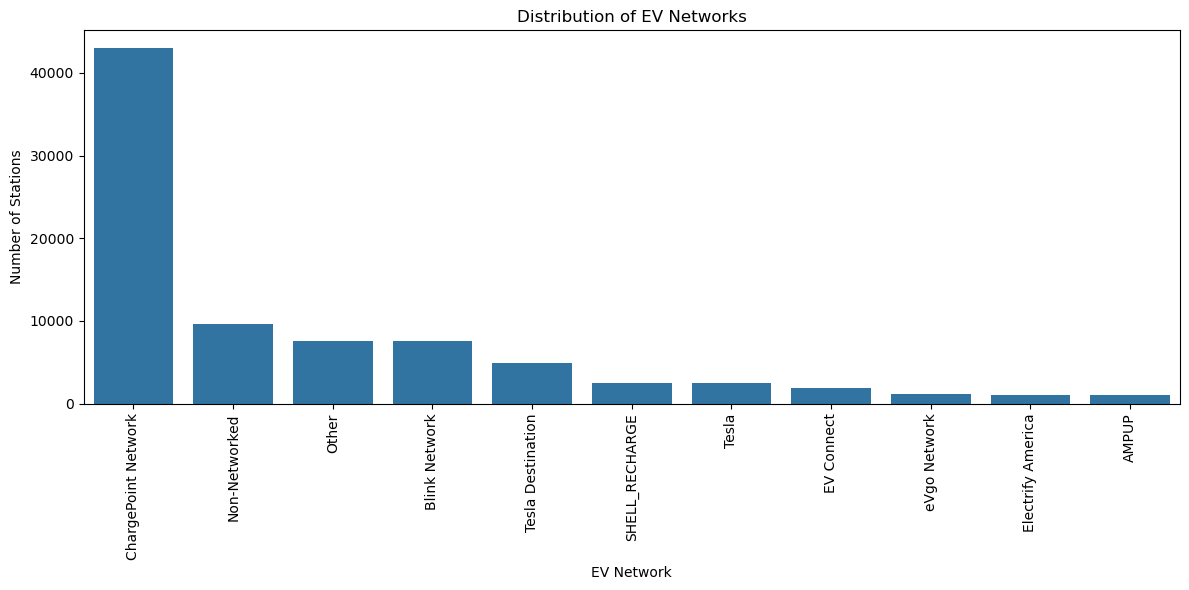

In [44]:
# Plotting EV Network (target variable)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ev_network_cleaned', order=df['ev_network_cleaned'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of EV Networks')
plt.xlabel('EV Network')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()

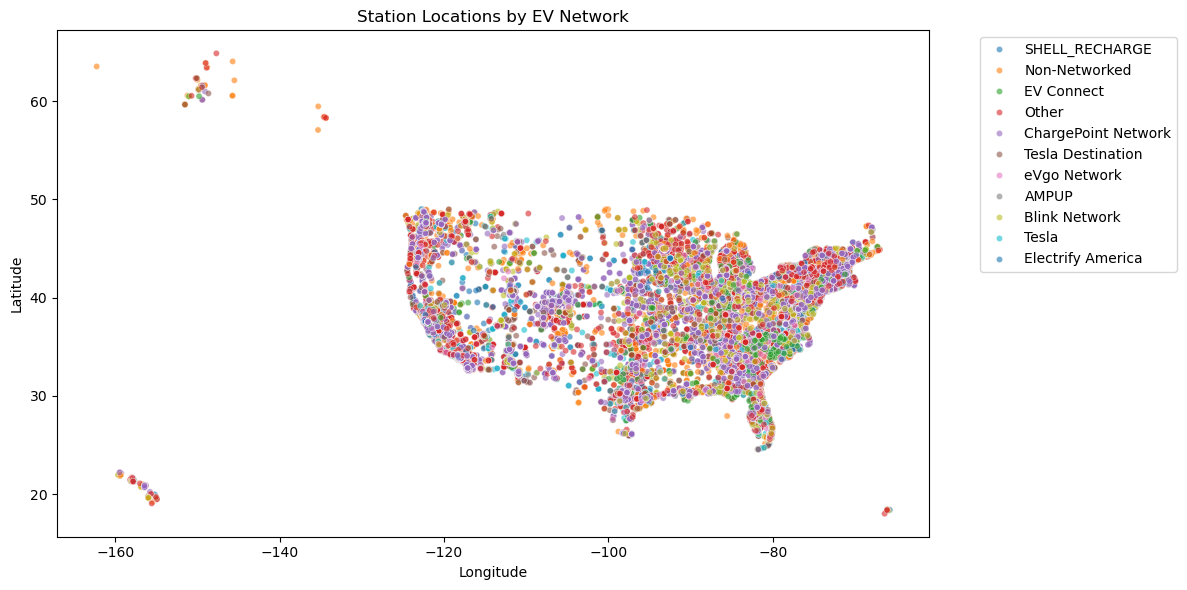

In [45]:
# Visualizing the geographical locations of EV Charging Stations

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ev_network_cleaned', s=20, palette='tab10', alpha=0.6)
plt.title('Station Locations by EV Network')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_14560/3430812907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='viridis')


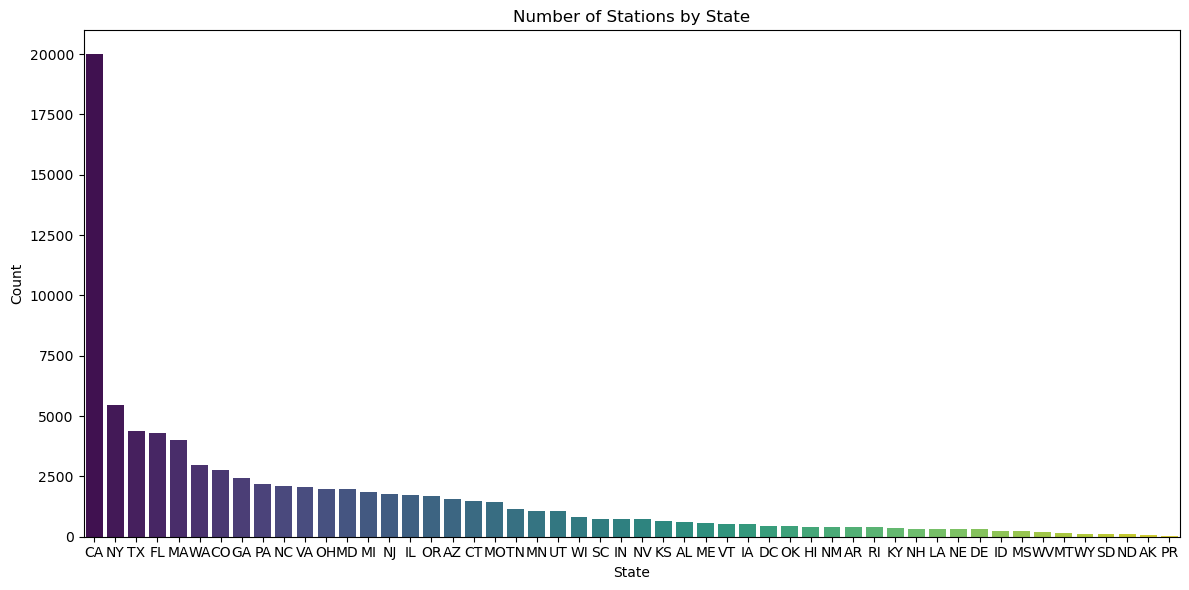

In [46]:
# Visualization of Charging Station counts vs. State 

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='viridis')
plt.title('Number of Stations by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_14560/1819293497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=connector_counts.index, y=connector_counts.values, palette='Blues_r')


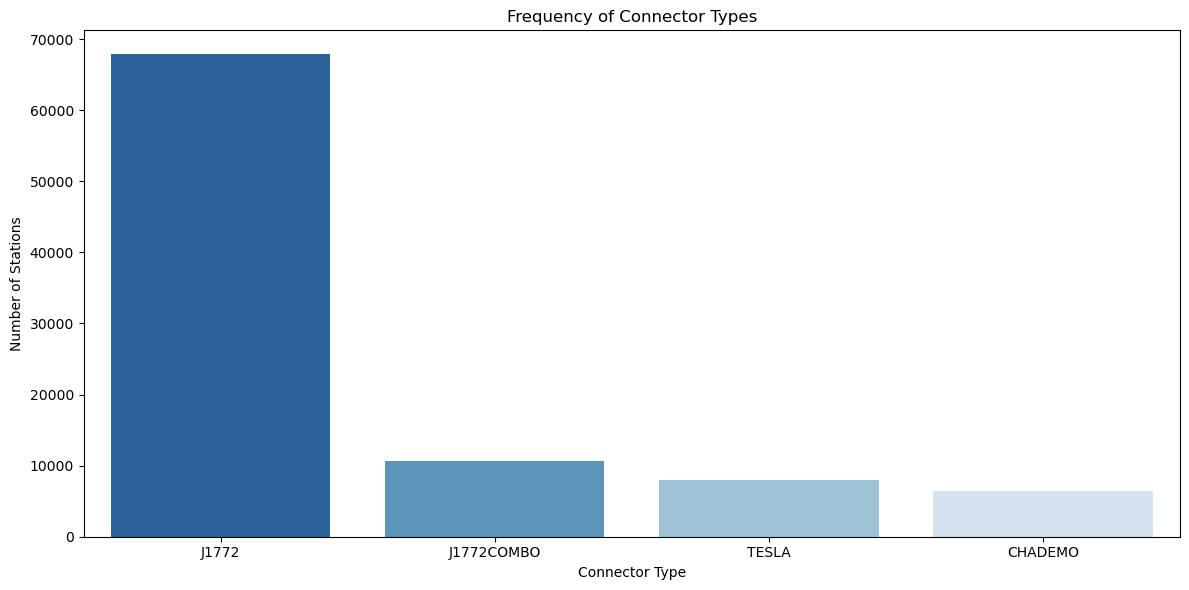

In [47]:
# Plotting different types of connectors

connector_cols = ['CHADEMO', 'J1772', 'J1772COMBO', 'TESLA']
connector_counts = df[connector_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=connector_counts.index, y=connector_counts.values, palette='Blues_r')
plt.title('Frequency of Connector Types')
plt.ylabel('Number of Stations')
plt.xlabel('Connector Type')
plt.tight_layout()
plt.show()

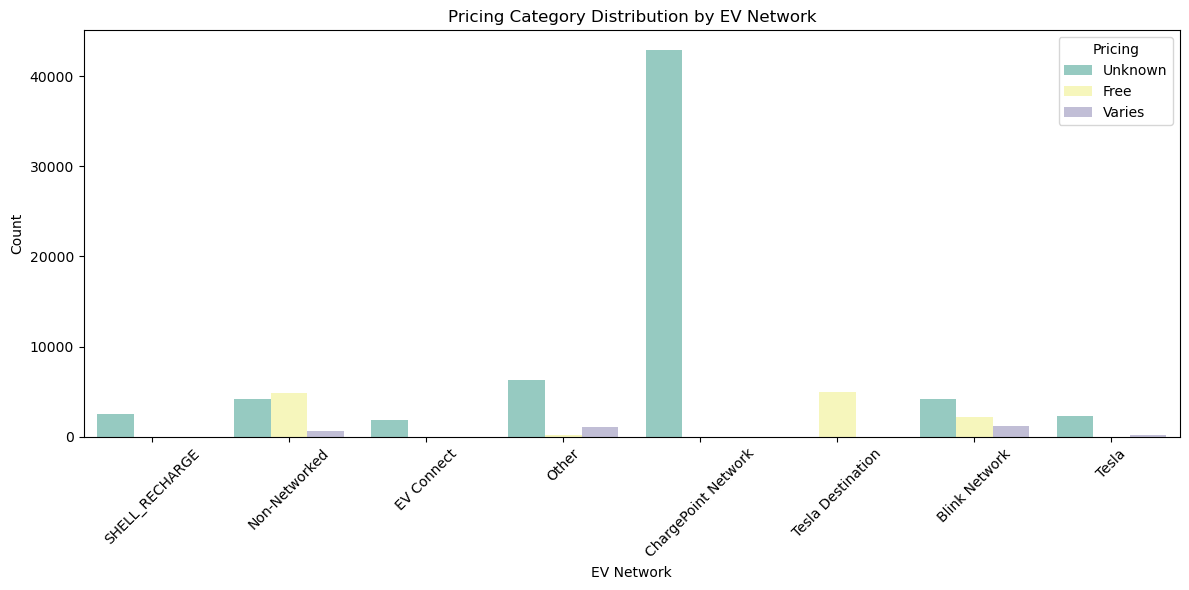

In [48]:
# Visualization of EV Networks & Pricing data

top_networks = df['ev_network_cleaned'].value_counts().nlargest(8).index
subset = df[df['ev_network_cleaned'].isin(top_networks)]

plt.figure(figsize=(12, 6))
sns.countplot(data=subset, x='ev_network_cleaned', hue='pricing_category', palette='Set3')
plt.title('Pricing Category Distribution by EV Network')
plt.xlabel('EV Network')
plt.ylabel('Count')
plt.legend(title='Pricing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interestingly the largest network has unknown pricing values

### 5. Feature Engineering

In [50]:
# A quick look at my data types

df.dtypes

# Since I have a couple categorical columns they will need to be encoded.

latitude                float64
longitude               float64
state                    object
ev_level2_evse_num      float64
ev_dc_fast_num          float64
date_last_confirmed      object
status_code              object
ev_network_cleaned       object
access_time_category     object
pricing_category         object
CHADEMO                 float64
J1772                   float64
J1772COMBO              float64
TESLA                   float64
dtype: object

In [51]:
# To begin, converting date_last_confirmed to datetime format

df['date_last_confirmed'] = pd.to_datetime(df['date_last_confirmed'], errors='coerce')
df['year_confirmed'] = df['date_last_confirmed'].dt.year
df['month_confirmed'] = df['date_last_confirmed'].dt.month
df.drop(columns=['date_last_confirmed'], inplace=True)

In [52]:
# One hot encoding my categorical features

df_encoded = pd.get_dummies(df, columns=[
    'state',
    'status_code',
    'access_time_category',
    'pricing_category'
], drop_first=False)

In [53]:
# Separating features for train test split

from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=['ev_network_cleaned']) # Features used for model, minus target variable
y = df_encoded['ev_network_cleaned'] # Target variable

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80 - 20 split
    random_state=1,
    stratify=y
)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (66212, 72)
Test shape: (16554, 72)


In [54]:
# Double checking that stratification was performed across the dataset.

print('Class distribution in full dataset:')
print(y.value_counts(normalize=True))

print('\nClass distribution in train set:')
print(y_train.value_counts(normalize=True))

print('\nClass distribution in test set:')
print(y_test.value_counts(normalize=True))

Class distribution in full dataset:
ev_network_cleaned
ChargePoint Network    0.519404
Non-Networked          0.116521
Other                  0.090822
Blink Network          0.090786
Tesla Destination      0.059940
SHELL_RECHARGE         0.030496
Tesla                  0.030459
EV Connect             0.022195
eVgo Network           0.014221
Electrify America      0.012723
AMPUP                  0.012433
Name: proportion, dtype: float64

Class distribution in train set:
ev_network_cleaned
ChargePoint Network    0.519407
Non-Networked          0.116520
Other                  0.090814
Blink Network          0.090784
Tesla Destination      0.059944
SHELL_RECHARGE         0.030493
Tesla                  0.030463
EV Connect             0.022201
eVgo Network           0.014227
Electrify America      0.012717
AMPUP                  0.012430
Name: proportion, dtype: float64

Class distribution in test set:
ev_network_cleaned
ChargePoint Network    0.519391
Non-Networked          0.116528
Other 

### 6. Model Building and Comparison

#### First Model: Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Creating an instance of Random Forest
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Prediction
rf_preds = rf_model.predict(X_test)

# Evaluation
print('Random Forest Results')
print('Accuracy:', accuracy_score(y_test, rf_preds))
print('Classification Report:\n', classification_report(y_test, rf_preds))

Random Forest Results
Accuracy: 0.8927147517216383
Classification Report:
                      precision    recall  f1-score   support

              AMPUP       0.93      0.87      0.90       206
      Blink Network       0.82      0.73      0.77      1503
ChargePoint Network       0.92      0.97      0.95      8598
         EV Connect       0.46      0.25      0.33       367
  Electrify America       0.59      0.63      0.61       211
      Non-Networked       0.92      0.94      0.93      1929
              Other       0.84      0.75      0.80      1504
     SHELL_RECHARGE       0.81      0.69      0.74       505
              Tesla       0.99      1.00      1.00       504
  Tesla Destination       0.94      0.98      0.96       992
       eVgo Network       0.58      0.63      0.60       235

           accuracy                           0.89     16554
          macro avg       0.80      0.77      0.78     16554
       weighted avg       0.89      0.89      0.89     16554



<Figure size 1000x800 with 0 Axes>

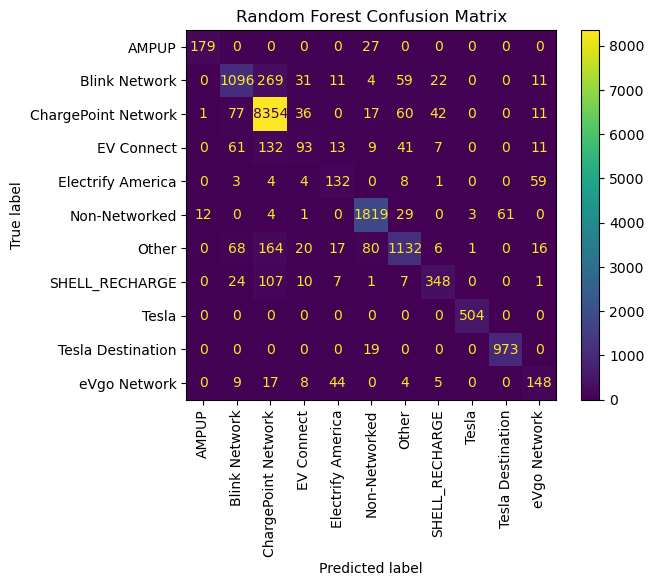

In [58]:
# Observing Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, xticks_rotation=90, cmap='viridis')
plt.title('Random Forest Confusion Matrix')
plt.show()

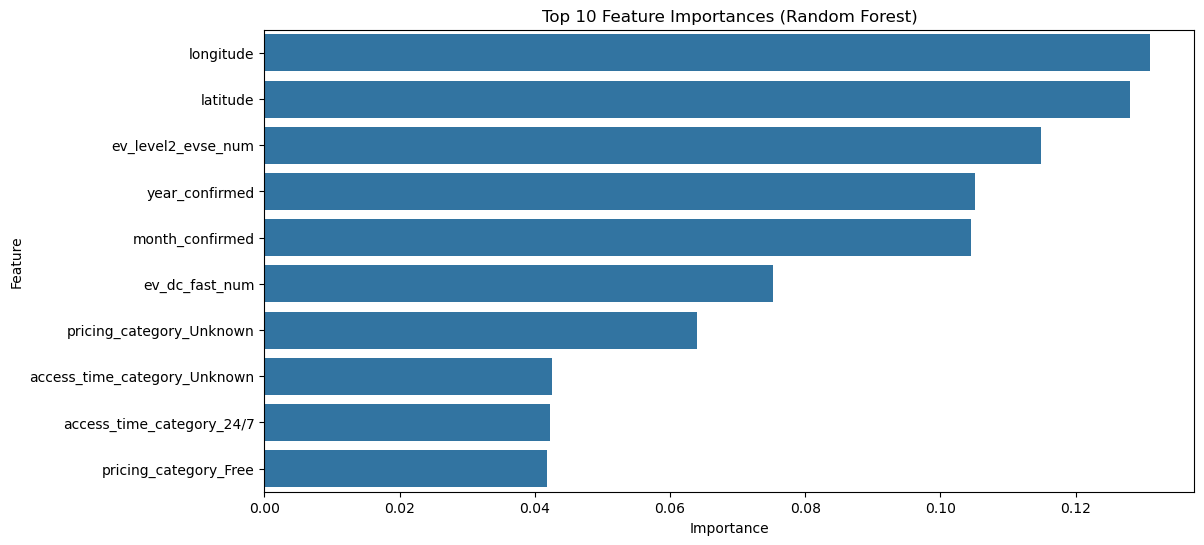

In [59]:
# Within this model, which features are the most important
importances = rf_model.feature_importances_
features = X_train.columns

# Displaying and Sorting in ascending order
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

#### Second Model: Logistic Regression

In [61]:
# For this model, scaling will be required.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=1)
lr_model.fit(X_train_scaled, y_train)

# Prediction
lr_preds = lr_model.predict(X_test_scaled)

# Evaluation
print('Logistic Regression Results')
print('Accuracy:', accuracy_score(y_test, lr_preds))
print('Classification Report:\n', classification_report(y_test, lr_preds))

Logistic Regression Results
Accuracy: 0.8187749184487133
Classification Report:
                      precision    recall  f1-score   support

              AMPUP       0.80      0.69      0.74       206
      Blink Network       0.89      0.55      0.68      1503
ChargePoint Network       0.82      0.98      0.90      8598
         EV Connect       0.10      0.02      0.03       367
  Electrify America       0.49      0.60      0.54       211
      Non-Networked       0.86      0.79      0.82      1929
              Other       0.67      0.41      0.51      1504
     SHELL_RECHARGE       0.64      0.53      0.58       505
              Tesla       0.97      0.99      0.98       504
  Tesla Destination       0.93      1.00      0.96       992
       eVgo Network       0.55      0.41      0.47       235

           accuracy                           0.82     16554
          macro avg       0.70      0.63      0.66     16554
       weighted avg       0.80      0.82      0.80     16554



<Figure size 1000x800 with 0 Axes>

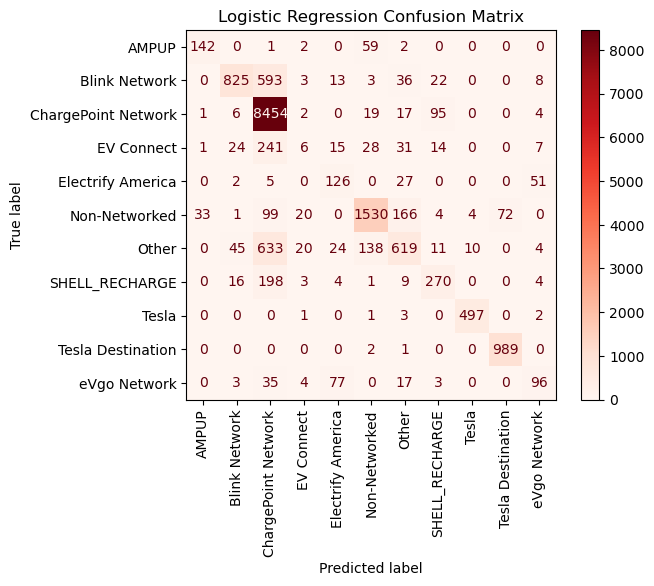

In [63]:
# Displaying Confusion Matrix

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_scaled, y_test, xticks_rotation=90, cmap='Reds')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Third Model: SVM

In [65]:
from sklearn.svm import SVC

# Initializing and training the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=1)
svm_model.fit(X_train_scaled, y_train)

# Predict
svm_preds = svm_model.predict(X_test_scaled)

# Evaluate
print(' SVM Results')
print('Accuracy:', accuracy_score(y_test, svm_preds))
print('Classification Report:\n', classification_report(y_test, svm_preds))

 SVM Results
Accuracy: 0.8399178446296968
Classification Report:
                      precision    recall  f1-score   support

              AMPUP       0.82      0.67      0.74       206
      Blink Network       0.82      0.61      0.70      1503
ChargePoint Network       0.84      0.99      0.91      8598
         EV Connect       0.79      0.05      0.10       367
  Electrify America       0.50      0.61      0.55       211
      Non-Networked       0.88      0.88      0.88      1929
              Other       0.83      0.45      0.59      1504
     SHELL_RECHARGE       0.72      0.52      0.61       505
              Tesla       0.98      0.98      0.98       504
  Tesla Destination       0.93      0.99      0.96       992
       eVgo Network       0.61      0.39      0.48       235

           accuracy                           0.84     16554
          macro avg       0.79      0.65      0.68     16554
       weighted avg       0.84      0.84      0.82     16554



<Figure size 1000x800 with 0 Axes>

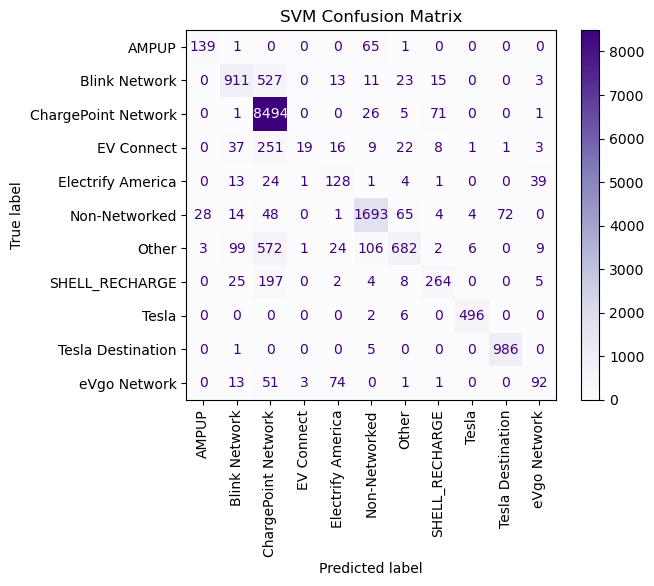

In [66]:
# Producing the confusion matrix

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test, xticks_rotation=90, cmap='Purples')
plt.title('SVM Confusion Matrix')
plt.show()

#### *Model Comparison*

In [68]:
# Comparing each of the results

print('Random Forest Results')
print('Accuracy:', accuracy_score(y_test, rf_preds))
print('Classification Report:\n', classification_report(y_test, rf_preds))
print('-' * 50)
print('Logistic Regression Results')
print('Accuracy:', accuracy_score(y_test, lr_preds))
print('Classification Report:\n', classification_report(y_test, lr_preds))
print('-' * 50)
print(' SVM Results')
print('Accuracy:', accuracy_score(y_test, svm_preds))
print('Classification Report:\n', classification_report(y_test, svm_preds))

Random Forest Results
Accuracy: 0.8927147517216383
Classification Report:
                      precision    recall  f1-score   support

              AMPUP       0.93      0.87      0.90       206
      Blink Network       0.82      0.73      0.77      1503
ChargePoint Network       0.92      0.97      0.95      8598
         EV Connect       0.46      0.25      0.33       367
  Electrify America       0.59      0.63      0.61       211
      Non-Networked       0.92      0.94      0.93      1929
              Other       0.84      0.75      0.80      1504
     SHELL_RECHARGE       0.81      0.69      0.74       505
              Tesla       0.99      1.00      1.00       504
  Tesla Destination       0.94      0.98      0.96       992
       eVgo Network       0.58      0.63      0.60       235

           accuracy                           0.89     16554
          macro avg       0.80      0.77      0.78     16554
       weighted avg       0.89      0.89      0.89     16554

-------

**Seeing as Random Forest has the highest accuracy score over the rest, this will be my final model selection.** 

#### Final Model Selection

Accuracy: 0.8927147517216383

Classification Report:
                      precision    recall  f1-score   support

              AMPUP       0.93      0.87      0.90       206
      Blink Network       0.82      0.73      0.77      1503
ChargePoint Network       0.92      0.97      0.95      8598
         EV Connect       0.46      0.25      0.33       367
  Electrify America       0.59      0.63      0.61       211
      Non-Networked       0.92      0.94      0.93      1929
              Other       0.84      0.75      0.80      1504
     SHELL_RECHARGE       0.81      0.69      0.74       505
              Tesla       0.99      1.00      1.00       504
  Tesla Destination       0.94      0.98      0.96       992
       eVgo Network       0.58      0.63      0.60       235

           accuracy                           0.89     16554
          macro avg       0.80      0.77      0.78     16554
       weighted avg       0.89      0.89      0.89     16554



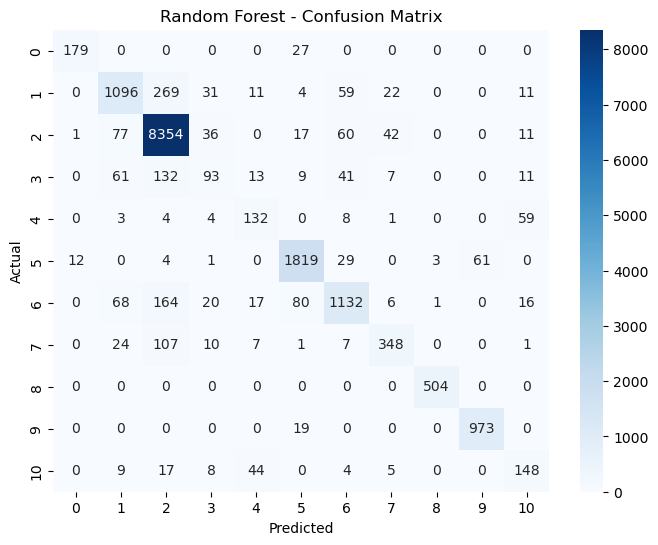

In [71]:
# Making predictions on the test set

rf_preds_final = rf_model.predict(X_test)

# Printing accuracy
print('Accuracy:', accuracy_score(y_test, rf_preds_final))

# Printing classification report
print('\nClassification Report:\n', classification_report(y_test, rf_preds_final))

# Plot confusion matrix
cm = confusion_matrix(y_test, rf_preds_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 7. Preparing to export to Streamlit

In [73]:
# From original df prior to pd.getdummies. Getting ready for deployment.
X = df.drop(columns=['ev_network_cleaned']) # Removing target variable
y = df['ev_network_cleaned'] # Defining target variable

In [74]:
categorical_features = ['state', 'status_code', 'access_time_category', 'pricing_category']

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_features = ['state', 'status_code', 'access_time_category', 'pricing_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [76]:
# Creating full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

In [77]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['state', 'status_code',
                                                   'access_time_category',
                                                   'pricing_category'])])),
                ('classifier', RandomForestClassifier(random_state=1))])

In [78]:
import joblib

joblib.dump(pipeline, 'final_rf_model.pkl')

['final_rf_model.pkl']